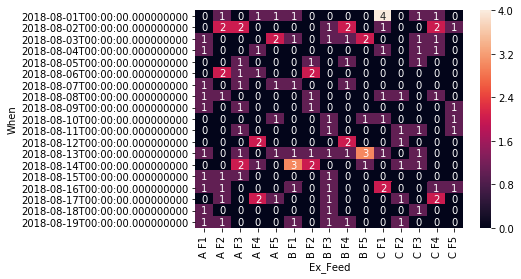

In [21]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from random import randint
import seaborn as sns
%matplotlib inline
# Some exchanges
exc=['A','B','C']
# A Feed
feed=['F1','F2','F3','F4','F5']
status=['Ok','Warning','Fail']

def good_bad_etc():
    global status
    v = randint(0,100)
    if v<80:
            return status[0]
    elif v<94:
            return status[1]
    else:
            return status[2]

# Data Frame with GOOD Data Only in it
df_good=pd.DataFrame(columns=['Id','When','Exchange','Feed','Status'])

#
# Fake Some Data
#

# Set the ID
df_good.Id=[a for a in range(0,len(df_good))]
# Generate a Date/Time Value
df_good.When=pd.date_range(start="1-Aug-2018",end="20-Aug-2018",freq='15min')

id=[a for a in range(0,len(df_good))]
ex=[exc[randint(0,len(exc)-1)] for a in range(0,len(df_good))]
fd=[feed[randint(0,len(feed)-1)] for a in range(0,len(df_good))]
df_good.Id=id
df_good.Exchange=ex
df_good.Feed=fd
# Use a simple Function to skew the Dist of the Good-Bad etc
df_good.Status=df_good.Status.apply(lambda x: good_bad_etc())

df_good['Ex_Feed']=df_good.Exchange+" "+df_good.Feed

#
#  Remove all the OK's !!
#
df_good=df_good[df_good.Status!='Ok']



df_summary=df_good.groupby(by=['When','Ex_Feed','Status']).size().to_frame('size').reset_index().sort_values(['size'], ascending=[False])
df_summary.index=pd.DatetimeIndex(df_summary.When)
#Remove the Col as we are using it as an index
df_summary.drop(columns=['When'],inplace=True)
df_grouped=df_summary.groupby(['Ex_Feed','Status']).resample('d')['size'].sum()
#
#Now remove the index ...i.e. flatten the Output
df_grouped=df_grouped.reset_index()
#
# Only Process Failed Links
#
df_fail=(df_grouped[df_grouped.Status=='Fail']).drop(columns=['Status'])
#
#
df_fail=df_fail.pivot("When","Ex_Feed","size")
#MUST get rid of nan values - else nasty crash will occur.
df_fail.fillna(0,inplace=True)
sns.heatmap(df_fail, annot=True)